In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [7]:
plt.rcParams['figure.figsize'] = 7,7
plt.rcParams['axes.linewidth'] = 2.0
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

### Import data

In [8]:
subdir=[]
dir='/home/cadeniran/u1/amphiscan-pep/results_grid'
dirlist = [ item for item in os.listdir(dir) if os.path.isdir(os.path.join(dir, item)) ]
for dir in dirlist:
    subdir.append(dir)
subdir.sort()

In [9]:
# Load data w/ dictionary to hold the DataFrames
data=[]
df_pep = {}

for i in subdir:
    os.chdir("/home/cadeniran/u1/amphiscan-pep/results_grid_old/"+str(i))
    data = pd.read_csv("rmsd_values.csv", header=None, sep=',', engine='python', names=['ID', 'RMSD', 'z_increment', 'pert_num'])
    df_pep[str(i)] = pd.DataFrame(data)

In [10]:
for i in subdir:
    print(str(i)+":" , df_pep[str(i)].loc[:, 'RMSD'].mean().round(2))

10_5_1: 4.88
20_10_5: 6.41
20_15_10: 6.78
20_5_1: 6.29
25_10_5: 7.14
25_15_5: 6.53
30_10_5: 7.2
30_15_5: 7.38
30_20_10: 6.6
30_20_5: 7.02
30_25_10: 6.84
30_25_5: 7.42


### Define data groupings

In [11]:
all_per = pd.DataFrame({'30_25_10': df_pep["30_25_10"]["RMSD"],
                        '30_25_5': df_pep["30_25_5"]["RMSD"],
                        '30_20_10': df_pep["30_20_10"]["RMSD"],
                        '30_20_5': df_pep["30_20_5"]["RMSD"],
                        '30_15_5': df_pep["30_15_5"]["RMSD"],
                        '30_10_5': df_pep["30_10_5"]["RMSD"],
                        '25_15_5': df_pep["25_15_5"]["RMSD"],
                        '25_10_5': df_pep["25_10_5"]["RMSD"],
                        '20_15_10': df_pep["20_15_10"]["RMSD"],
                        '20_10_5': df_pep["20_10_5"]["RMSD"],
                        '20_5_1': df_pep["20_5_1"]["RMSD"],
                        '10_5_1': df_pep["10_5_1"]["RMSD"]})

## Plots

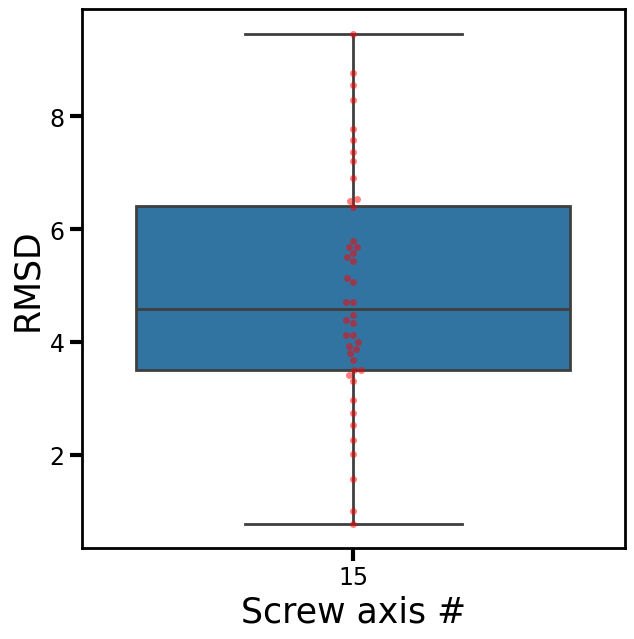

In [12]:
ax = sns.boxplot(x="pert_num", y="RMSD", data=df_pep["10_5_1"], showfliers = True, linewidth=2)
ax = sns.swarmplot(x="pert_num", y="RMSD", data=df_pep["10_5_1"], color="r", alpha=0.5)

#ax.set_ylim([0, 26])
plt.xlabel("Screw axis #", fontsize=25)
plt.ylabel("RMSD", fontsize=25)
plt.tick_params(axis='both', labelsize='17', length=9, width=3)

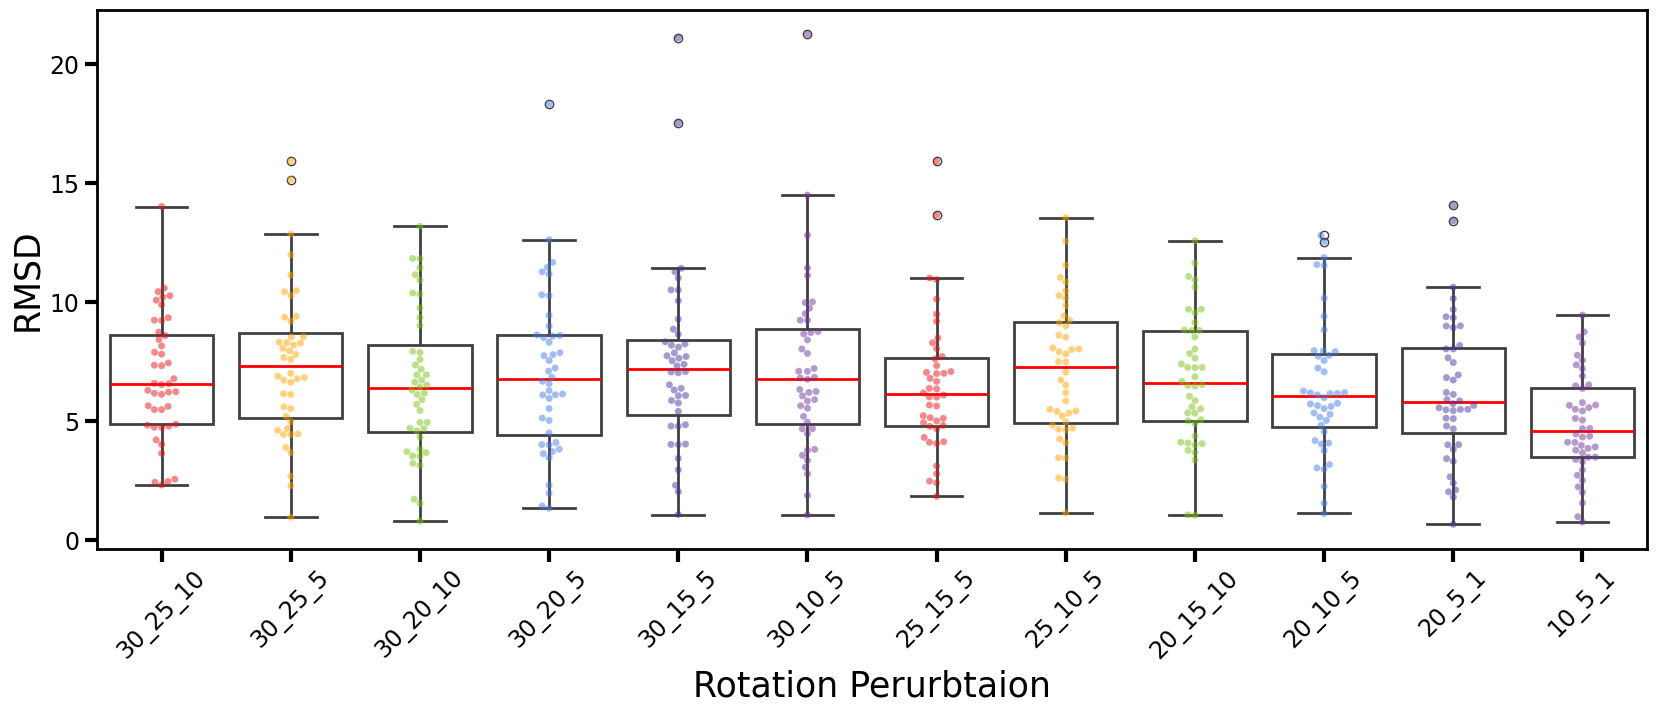

In [15]:
plt.rcParams['figure.figsize'] = 20,7
colors = ['#e81416', '#ffa500', '#79c314', '#487de7', '#4b369d', '#70369d',
          '#e81416', '#ffa500', '#79c314', '#487de7', '#4b369d', '#70369d']

ax = sns.boxplot(data=all_per, linewidth=2, color="white", medianprops=dict(color="red", alpha=1),)
ax = sns.swarmplot(data=all_per, palette=colors, alpha=0.5)

#ax.set_ylim([0, 27])
plt.xlabel("Rotation Perurbtaion", fontsize=25)
plt.xticks(rotation=45)
plt.ylabel("RMSD", fontsize=25)
plt.tick_params(axis='both', labelsize='17', length=9, width=3)

#plt.show()
plt.savefig("/home/cadeniran/ipn/figs/all-per.png", transparent=True, bbox_inches='tight')